# Random Walk


As a physics student sometimes you see some random movement in nature like brownian motion(it's actually deterministic). we can use stochastic litrature to study brownian motion and find lots of valuable information about this process. Random walk is somehow one of the most instructive models that can help you understand how random process can model the nature.

for the beging let's see what random walk is. according to Wikipedia(https://en.wikipedia.org/wiki/Random_walk) random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers.

An elementary example of a random walk is the random walk on the integer number line, ${\displaystyle \mathbb {Z} }$ , which starts at 0 and at each step moves +1 or −1 with equal probability. Other examples include the path traced by a molecule as it travels in a liquid or a gas (see Brownian motion), the search path of a foraging animal, the price of a fluctuating stock and the financial status of a gambler: all can be approximated by random walk models, even though they may not be truly random in reality.

We know that you are passionate and want to explore all details of these process(joke :) ) but for the begining let's start with the simplest model, one dimensional random walk with same probability for right and left step.

1. the simplest model of random walk is a One-dimensional random walk, which starts at 0 and at each step moves +1 or −1 with equal probability. consider 10000_step 1d random walk. and use $10^5$ ensemble. in each ensemble begin from the origin(0) and record the endpoint at 10000th step. plot the PDF of these endpoints. also, calculate the first four moments of this PDF.

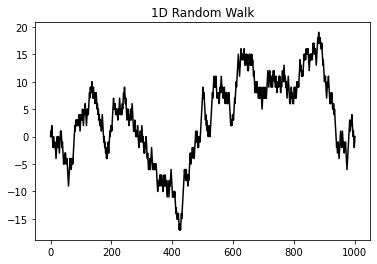

In [1]:
#random walk in 1D
import numpy as np
import matplotlib.pyplot as plt
import random
def randomwalk1D(n):
    x, y = 0, 0
    timepoints = np.arange(n + 1)
    positions = [y]
    directions = ["UP", "DOWN"]
    for i in range(1, n + 1):
        step = random.choice(directions)
        if step == "UP":
            y += 1
        elif step == "DOWN":
            y -= 1
        positions.append(y)
    return timepoints, positions
time_data, pos_data = randomwalk1D(1000)
plt.plot(time_data, pos_data, 'k-')
plt.title("1D Random Walk")
plt.show()

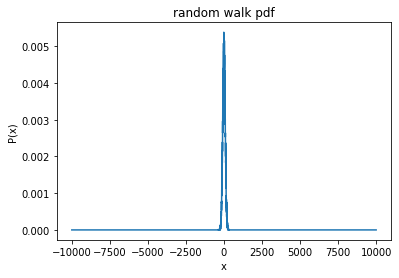

In [2]:
#pdf of random walk
from pylab import *
N = 10000
nsample = 100000
x = zeros(nsample)
for i in range(nsample):
    z = randint (3,size=N)-1
    x[i] = sum(z)
edges = array(range(-N,N+1))-0.5
Nx,e = histogram(x,edges)
x = (edges[:-1]+edges[1:])/2.0
dx = diff(edges)
Px = Nx/(dx*nsample)
plot(x,Px), xlabel('x'), ylabel('P(x)')
plt.title('random walk pdf')
show()

In [3]:
import scipy
import scipy.stats as stats
from scipy import stats
moments = scipy.stats.describe(x)

In [4]:
#first moment
moments.mean

-0.5

In [5]:
#second moment
moments.variance

33335000.0

In [6]:
#third moment
moments.skewness

0.0

In [7]:
#fourth moment
moments.kurtosis

-1.2000000059999998

now look at the plot you create. does it looklike a normal distribution? if yes isn't it strange cause we know that the probability is bionomial not guassian.


In [8]:
#Yes its looklike a  normal distribution. The Gaussian distribution can be considered as a special case of the binomial, when the number of tries is sufficiently large. For this reason, the Gaussian distribution applies to a large number of variables, and it is referred to as the normal distribution.

2.change the probability of jumping to right and left in a way that $P_{left} = 2 P_{right}$ and then repeat the process of Q1 again and evaluate the PDF and first four moments and cumulants. 

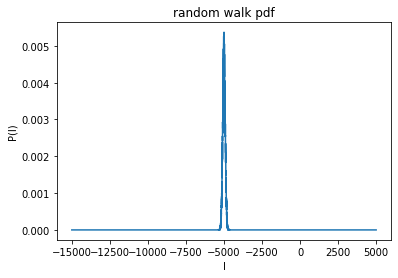

In [9]:
from pylab import *
N = 10000 
nsample = 100000
l = zeros(nsample)
for i in range(nsample):
   z = randint (3,size=N)-1
   l[i] = sum(z)
edges = array(range(-N,N+1))-(0.5)
Nl,e = histogram(l,edges)
l = (2*(edges[:-1])+edges[:+1])/2
dl = diff(edges)
Pl = Nl/(dx*nsample)
plot(l,Pl), xlabel('l'), ylabel('P(l)')
plt.title('random walk pdf')
show()

In [10]:
moments = scipy.stats.describe(l)

In [11]:
#first moment
moments.mean

-5001.25

In [12]:
#second moment
moments.variance

33335000.0

In [13]:
#third moment
moments.skewness

0.0

In [14]:
#fourth moment
moments.kurtosis

-1.2000000059999998

according to your result, can you tell how the shape of PDF function related to its cumulants?

In [15]:
#When the probability of going left increases then we can see that the mean value shifts to the left and about cumulants the mean changes to negative because of the greater probability of the left side and
#about variance, the left and variance did not have any changes like third and fourth moments! 

# Conditional Probability


Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice? if Yes write a it's code to tell Us why and if your answer is No code it to prove the first group they are wrong:)

In [36]:
import random
stay = 0  
switch = 0 

for i in range(1000):
    lst = [1,0,0]          
    random.shuffle(lst)    
    ran = random.randrange(3) 
    user = lst[ran] 
    del(lst[ran]) 
    huh = 0
    for i in lst:
        if i ==0:
            del(lst[huh]) 
            break
        huh+=1
 
    if user ==1: 
        stay+=1/10
 
    if lst[0] == 1: 
        switch+=1/10
 
print("Yes =",stay)
print("No = ",switch)

Yes = 34.30000000000022
No =  65.70000000000054



# Centeral limit theorem

Choose a non-Gaussian distribution (uniform/bionomial/poission) and generate $10^5$ random variables for each of them.                                                      
a) plot the PDF of samples you created .                                                   
b) create $10^4$ random subset of length {2 , 5 , 10 , 20 , 100} from the first non-Gaussian distribution and caclculate mean of each subset, then plot the PDF of these means.                                                                       
c) what do you understand form comparing the original distribution with those five?


In [17]:
#Poission Distribution
import numpy as np
s = np.random.poisson(5, 100000)

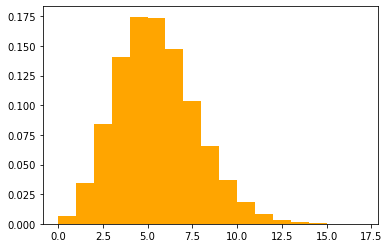

In [18]:
#PDF of poission

import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s,17 , density=True,color='orange')
plt.show()

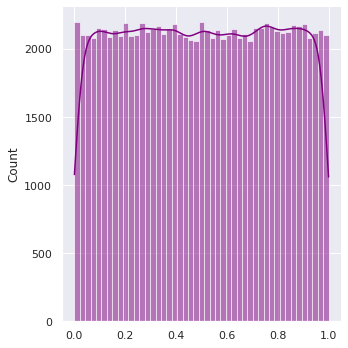

In [19]:
import seaborn as sns
rand = np.random.uniform(0,1,100000)
s_sub = [2 , 5 , 10 , 20 , 100]
sub = []
for n in s_sub:
  for i in range(10000):
    sub.append(np.random.choice(rand, n, replace = True))
sns.set_theme()
sns.displot(rand, kde=True,color='purple')
plt.show()

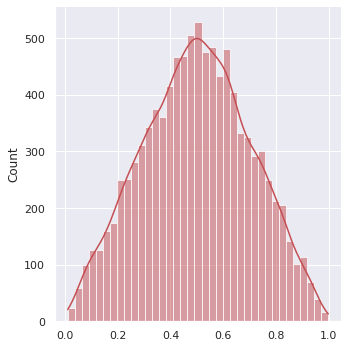

In [24]:
s_1 = [2]
sub = []
for n in s_1:
  for i in range(10**4):
    sub.append(np.random.choice(rand, n, replace = True))
mean = []
for s in sub:
  mean.append(s.mean())
sns.displot(mean, kde=True,color='r')
plt.show()

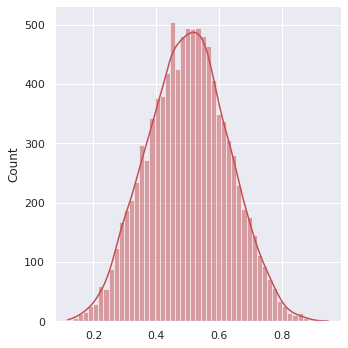

In [25]:
s_2 = [5]
sub = []
for n in s_2:
  for i in range(10**4):
    sub.append(np.random.choice(rand, n, replace = True))
mean = []
for s in sub:
  mean.append(s.mean())
sns.displot(mean, kde=True,color='r')
plt.show()

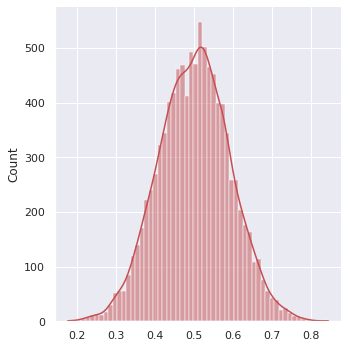

In [26]:
s_3 = [10]
sub = []
for n in s_3:
  for i in range(10**4):
    sub.append(np.random.choice(rand, n, replace = True))
mean = []
for s in sub:
  mean.append(s.mean())
sns.displot(mean, kde=True,color='r')
plt.show()

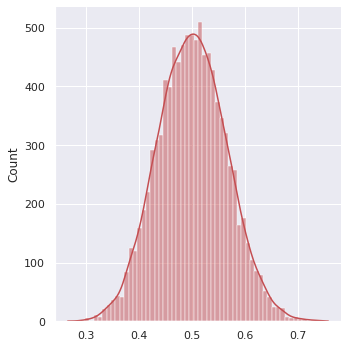

In [27]:
s_4 = [20]
sub = []
for n in s_4:
  for i in range(10**4):
    sub.append(np.random.choice(rand, n, replace = True))
mean = []
for s in sub:
  mean.append(s.mean())
sns.displot(mean, kde=True,color='r')
plt.show()

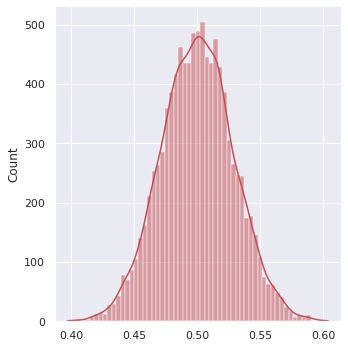

In [28]:
s_5 = [100]
sub = []
for n in s_5:
  for i in range(10**4):
    sub.append(np.random.choice(rand, n, replace = True))
mean = []
for s in sub:
  mean.append(s.mean())
sns.displot(mean, kde=True,color='r')
plt.show()

# Poission Approximation

Use python libraries to generate bionomial and poission distributions for different N’s (remember $\lambda =NP$). Over plot them for N = {5, 10, 20, 50, 100, 200, 1000}
How does it behave as N increases? 



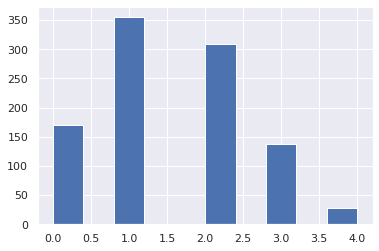

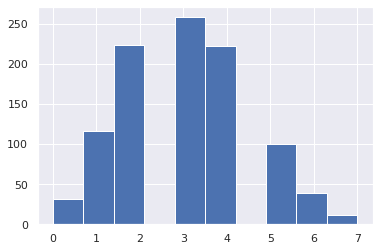

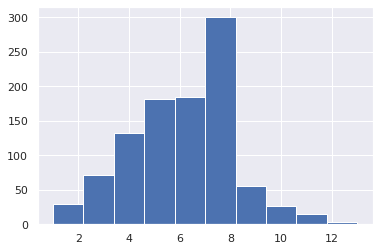

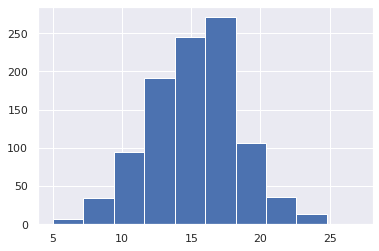

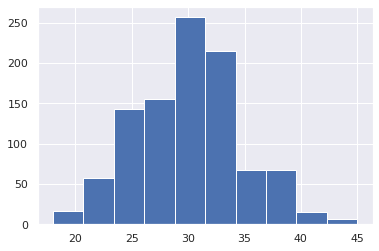

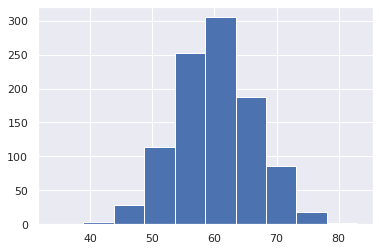

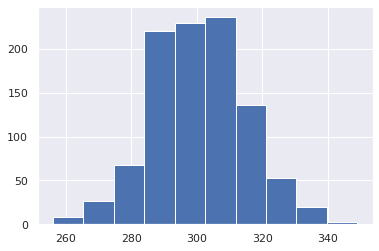

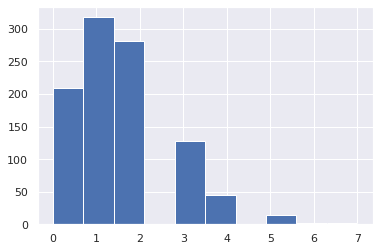

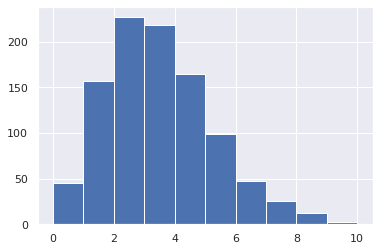

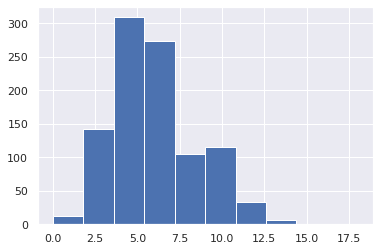

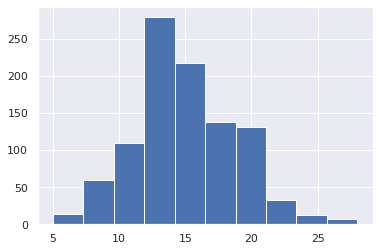

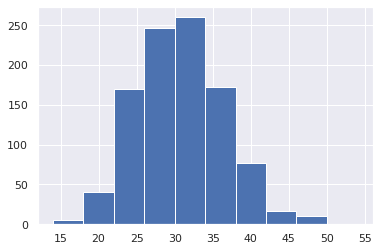

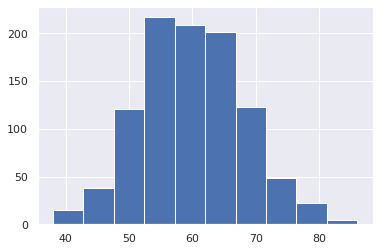

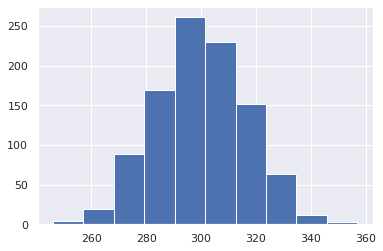

In [60]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

N = [5, 10, 20, 50, 100, 200,1000]
lamda= [5*0.3, 10*0.3, 20*0.3, 50*0.3, 100*0.3, 200*0.3,1000*0.3]
for i in N:
    b=np.random.binomial(n=i , p=0.3, size=1000)
    plt.hist(b)
    plt.show()
for i in lamda:
    p=np.random.poisson(i, size=1000)
    plt.hist(p)
    plt.show()

# Box Muller Method

1- generate Normal distribution from uniform distribution (Box-Muller algorithm(https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform)- do not need to derive and prove it. the topic will be included in lectures in the following week). Normal= zero mean, unit variance    
a)Sample many points from this distribution. plot the pdf of the sample (plot hist).             
                              


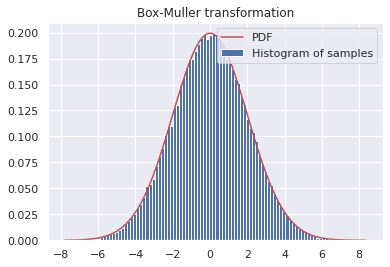

In [76]:
#pdf box muller
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
from numpy.random import uniform

mu=0;sigma=2
L=100000 
U1 = uniform(low=0,high=1,size=(L,1)) 
U2 = uniform(low=0,high=1,size=(L,1)) 
a = np.sqrt(-2*np.log(U1))
b = 2*np.pi*U2
Z = a*np.cos(b) 
box_muller = Z*sigma+mu 

fig, ax1 = plt.subplots(ncols=1, nrows=1) 
(values, bins, _) = ax1.hist(box_muller,bins=100,density=True,label="Histogram of samples") 
bin_centers = 0.5*(bins[1:] + bins[:-1])
pdf = stats.norm.pdf(x = bin_centers, loc=mu, scale=sigma) 
ax1.plot(bin_centers, pdf, label="PDF",color='r') 
ax1.legend()
ax1.set_title('Box-Muller transformation');

b)Calculate mean of the sample. Its variance.

In [62]:
mean = np.array(box_muller).mean()
mean

0.010645326749050013

In [63]:
variance = np.array(box_muller).var()
variance

3.9798211326518467

c)Overplot the pdf now, using this mean and variance (on the plot hist). Also use the mean and std deviation functions from python library. Do they agree?

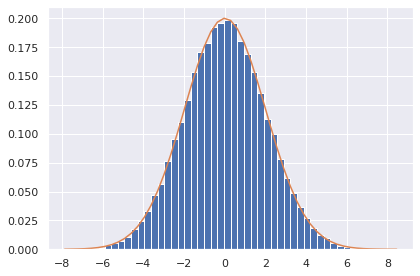

In [92]:
sigma = (variance)**(0.5) 
nbins = 50
fig, ax = plt.subplots()
n, bins, patches = ax.hist(box_muller, nbins, density=True)
s = ((1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-0.5 * (1 / sigma * (bins - mean))**2))
ax.plot(bins,s)
fig.tight_layout()
plt.show()

d)Now that you have your Normal distribution, how can you turn it into a Gaussian distribution with  given mean and variance? For example mean=2, and std dev=4 ?   

Text(0, 0.5, 'Probability Density')

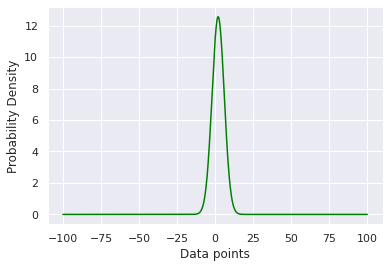

In [93]:
import numpy as np
import matplotlib.pyplot as plt
 
x = np.linspace(-100,100,10000)

def normal(x , mean , sd):
    prob_density = (np.pi*sd) * np.exp(-0.5*((x-mean)/sd)**2)
    return prob_density

mean = 2
sd = 4

pdf = normal(x,mean,sd)

plt.plot(x,pdf , color = 'green')
plt.xlabel('Data points')
plt.ylabel('Probability Density')

there are two problems left, but you can choose one of them to solve.(we highly recommend you to solve both of them)

# Nice Matrix

A matrix of size n$\times$n which include numbers of {1,2,3,...,$n^2$} is called nice, if sum of all rows and columns  are the same. write a code that get n as a input and return a n$\times$n Nice Matrix. print out the examples of Nice Matrix for n = 4,5,6

In [94]:
def nice_matrix_even(n):
     
    arr = [[(n*y)+x+1 for x in range(n)]for y in range(n)]

    for i in range(0,n//4):
        for j in range(0,n//4):
            arr[i][j] = (n*n + 1) - arr[i][j];
     
    for i in range(0,n//4):
        for j in range(3 * (n//4),n):
            arr[i][j] = (n*n + 1) - arr[i][j];
 
    for i in range(3 * (n//4),n):
        for j in range(0,n//4):
            arr[i][j] = (n*n + 1) - arr[i][j];
     
    for i in range(3 * (n//4),n):
        for j in range(3 * (n//4),n):
            arr[i][j] = (n*n + 1) - arr[i][j];
             
    for i in range(n//4,3 * (n//4)):
        for j in range(n//4,3 * (n//4)):
            arr[i][j] = (n*n + 1) - arr[i][j];
     
    for i in range(n):
        for j in range(n):
            print ('%2d ' %(arr[i][j]),end=" ")
        print()

n = 4
nice_matrix_even(n)
    

16   2   3  13  
 5  11  10   8  
 9   7   6  12  
 4  14  15   1  


In [95]:
def nice_matrix_odd(n):
 
    magicSquare = [[0 for x in range(n)]
                   for y in range(n)]
 
    i = n // 2
    j = n - 1
 
    num = 1
    while num <= (n * n):
        if i == -1 and j == n:  
            j = n - 2
            i = 0
        else:
 
            if j == n:
                j = 0
 
            if i < 0:
                i = n - 1
 
        if magicSquare[int(i)][int(j)]: 
            j = j - 2
            i = i + 1
            continue
        else:
            magicSquare[int(i)][int(j)] = num
            num = num + 1
 
        j = j + 1
        i = i - 1  
 
    print("Magic Square for n =", n)
    print("Sum of each row or column",
          n * (n * n + 1) // 2, "\n")
 
    for i in range(0, n):
        for j in range(0, n):
            print('%2d ' % (magicSquare[i][j]),
                  end='')

            if j == n - 1:
                print()
n = 5
nice_matrix_odd(n)

Magic Square for n = 5
Sum of each row or column 65 

 9  3 22 16 15 
 2 21 20 14  8 
25 19 13  7  1 
18 12  6  5 24 
11 10  4 23 17 


In [96]:
def nice_matrix_even(n):
     
    arr = [[(n*y)+x+1 for x in range(n)]for y in range(n)]

    for i in range(0,n//4):
        for j in range(0,n//4):
            arr[i][j] = (n*n + 1) - arr[i][j];
     
    for i in range(0,n//4):
        for j in range(3 * (n//4),n):
            arr[i][j] = (n*n + 1) - arr[i][j];
 
    for i in range(3 * (n//4),n):
        for j in range(0,n//4):
            arr[i][j] = (n*n + 1) - arr[i][j];
     
    for i in range(3 * (n//4),n):
        for j in range(3 * (n//4),n):
            arr[i][j] = (n*n + 1) - arr[i][j];
             
    for i in range(n//4,3 * (n//4)):
        for j in range(n//4,3 * (n//4)):
            arr[i][j] = (n*n + 1) - arr[i][j];
     
    for i in range(n):
        for j in range(n):
            print ('%2d ' %(arr[i][j]),end=" ")
        print()

n = 6
nice_matrix_even(n)

36   2   3  33  32  31  
 7  29  28  10  11  12  
13  23  22  16  17  18  
18  20  21  15  14  13  
12  26  27   9   8   7  
 6  32  33   3   2   1  


# Honest and Liers

Suppose there 16 People sit around a circular table.  ٍEach claims that the two people next to him/her are liars. How many liars are there in the crowd? 